<a href="https://colab.research.google.com/github/SaraPMC/ProjetoMVC_1/blob/master/TrabalhoFinal/Exercicio1/TrabalhoFinal_RedesNeuraisMulticamadas_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Redes Neurais Multicamadas**

**Exercício #1**

Utilizando as bibliotecas do Keras e TensorFlow faça:

• Utilizando do dataset Iris (embarcado no scikit-learn, from sklearn
import datasets - datasets.load_iris() ), configure uma Rede Neural MLP
para classificar as amostras de plantas nas 3 classes presentes no
dataset.

• Utilizando o dataset Heart Disease UCI (disponível no repositório da
disciplina e em https://www.kaggle.com/ronitf/heart-disease-uci)
configure uma Rede Neural MLP que classifique as amostras em
saudáveis (coluna target =0) ou não.

• Utilizando o dataset Pulsar Star (disponível no repositório da disciplina e
em https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star/)
construa uma Rede Neural MLP que classifique as amostras em
estrelas de nêutrons ou não.

**Obs.:** os links para os datasets acima está dando 404 not found! Encontramos outros no site https://www.kaggle.com

* Heart Disease UCI: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


* Pulsar Star: https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate

In [49]:
#importando as bibliotecas

from sklearn import datasets
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


#import keras
#import tensorflow

In [50]:
#Importando o dataset iris
iris = datasets.load_iris()

In [51]:
#Separando os dados em X e y, os valores das caracteristicas independentes e dependentes
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target

In [52]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
#Separando entre treino e teste, onde 30% do conjunto é reservado para verificar a precisão do modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
sc_X = StandardScaler()
X_trainscaled = sc_X.fit_transform(X_train)
X_testscaled = sc_X.transform(X_test)

In [54]:
#Modelagem de 4 camadas ocultas com neuronios diferentes.
#Totalizando 6 camadas considerando as de entrada/saida
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation="relu", random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.9555555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


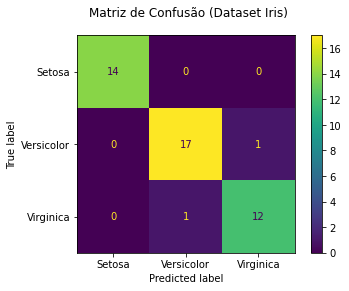

In [55]:
#Desenhando uma matriz de confução para entender a classificação
fig=plot_confusion_matrix(clf, X_testscaled, y_test,display_labels=["Setosa", "Versicolor", "Virginica"])
fig.figure_.suptitle("Matriz de Confusão (Dataset Iris)")
plt.show()